## Project 2 : Differentiation -- CPSMA 4413 Dr. Jacob -- Kennedy Thomas, Aaron Arias Vales, Dustin Tidmore ver2.1

In [16]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#true error
def terror(true, approx):
  error_t = true - approx
  return error_t

#relative true error 
def rterror(terror,tValue):
  RTerror = terror / tValue
  return RTerror

# function for e^x
def f(x):
  return math.exp(x)

# forward difference
def forward(x,h):
  forx = ((f(x+h) - f(x))) / h
  return forx

# backward difference
def backward(x,h):
  backx = ((f(x-h) - f(x))) / h
  return backx

# central difference
def center(x,h):
  centerx = ((f(x+h) - f(x-h))) / (2*h)
  return centerx

#finite difference
def finite(x,h):
  second_deriv = ( ( f(x+h) - (2*f(x)) + f(x-h) ) ) / h**2
  return second_deriv

In [ ]:
# dataframe for my approximations at x=2, using the .append feature
# .append feature is "deprecated" so used pd.concat but left this as another example
#df = pd.DataFrame(columns = ['h','true value','front estimate','back estimate','center estimate','finite difference'])
#for i in range(1,6):
 # df = df.append({'h': 1/10**i,
  #                'true value': f(2),
   #               'front estimate': forward(2,1/10**i),
    #              'back estimate': backward(2, 1/10**i),
     #             'center estimate': center(2,1/10**i),
      #            'finite difference': finite(2,1/10**i)},
       #           ignore_index=True)

#df

In [18]:
#Pandas Data Frame(s) laying out our data, separated into individual dataframes to concatenate later.
# using for loops to fill each frame with appropriate data
tx = 5 # tx is number of rows
dfh = pd.DataFrame({'h': [10**-i for i in range(1,tx+1)]})
dftrue = pd.DataFrame({'true val.': [f(2) for i in range(1,tx+1)]})
dfforward = pd.DataFrame({'forward est.': [forward(2,10**-i) for i in range(1,tx+1)]})
dfback = pd.DataFrame({'back est.': [backward(2,10**-i) for i in range(1,tx+1)]})
dfcenter = pd.DataFrame({'center est.': [center(2,10**-i) for i in range(1,tx+1)]})
dffinite = pd.DataFrame({'finite diff.': [finite(2,10**-i) for i in range(1,tx+1)]})

# dataframes for error values
dfForTruErr= pd.DataFrame({'forward true err.': [terror(f(2),forward(2,10**-i)) for i in range(1,tx+1)]})
dfBackTruErr = pd.DataFrame({'back true err.': [terror(f(2),backward(2,10**-i)) for i in range(1,tx+1)]})
dfCenterTruErr = pd.DataFrame({'center true err.': [terror(f(2),center(2,10**-i)) for i in range(1,tx+1)]})
dfFiniteTruErr = pd.DataFrame({'finite true err': [terror(f(2),finite(2,10**-i)) for i in range(1,tx+1)]})
dfForRelErr = pd.DataFrame({'forward relative err.': [rterror(terror(f(2),forward(2,10**-i)),f(2)) for i in range(1, tx+1)]})
dfBackRelErr = pd.DataFrame({'back relative err': [rterror(terror(f(2),backward(2,10**-i)),f(2)) for i in range(1, tx+1)]})
dfCenRelErr = pd.DataFrame({'center relative err': [rterror(terror(f(2),center(2,10**-i)),f(2)) for i in range(1, tx+1)]})
dfFiniteRelErr = pd.DataFrame({'finite relative err': [rterror(terror(f(2),finite(2,10**-i)),f(2)) for i in range(1, tx+1)]})

In [10]:
#concatenating the tables necessary for the forward difference derivative estimate

Forward_Table = pd.concat([dfh,dftrue,dfforward,dfForTruErr,dfForRelErr], axis= 1)
Forward_Table

,h,true val.,forward est.,forward true err.,forward relative err.
0,0.10000,7.389056,7.771138,-0.382082,-0.051709
1,0.01000,7.389056,7.426125,-0.037069,-0.005017
2,0.00100,7.389056,7.392752,-0.003696,-0.000500
3,0.00010,7.389056,7.389426,-0.000369,-0.000050
4,0.00001,7.389056,7.389093,-0.000037,-0.000005


In [11]:
#concatenating the tables necessary for the backward difference derivative estimate

Backward_Table = pd.concat([dfh,dftrue,dfback,dfBackTruErr,dfBackRelErr], axis = 1)
Backward_Table

,h,true val.,back est.,back true err.,back relative err
0,0.10000,7.389056,-7.031617,14.420673,1.951626
1,0.01000,7.389056,-7.352234,14.741290,1.995017
2,0.00100,7.389056,-7.385363,14.774419,1.999500
3,0.00010,7.389056,-7.388687,14.777743,1.999950
4,0.00001,7.389056,-7.389019,14.778075,1.999995


In [12]:
#concatenating the tables necessary for the central difference derivative estimate

Center_Table = pd.concat([dfh,dftrue,dfcenter,dfCenterTruErr,dfCenRelErr], axis = 1)
Center_Table

,h,true val.,center est.,center true err.,center relative err
0,0.10000,7.389056,7.401377,-1.232125e-02,-1.667500e-03
1,0.01000,7.389056,7.389179,-1.231516e-04,-1.666675e-05
2,0.00100,7.389056,7.389057,-1.231509e-06,-1.666666e-07
3,0.00010,7.389056,7.389056,-1.232264e-08,-1.667688e-09
4,0.00001,7.389056,7.389056,-1.856799e-10,-2.512904e-11


In [13]:
#concatenating the tables necessary for the second derivative estimate

Finite_Table = pd.concat([dfh,dftrue,dffinite,dfFiniteTruErr,dfFiniteRelErr], axis = 1)
Finite_Table

,h,true val.,finite diff.,finite true err,finite relative err
0,0.10000,7.389056,-1.329784e+03,1.337173e+03,1.809666e+02
1,0.01000,7.389056,-1.463033e+05,1.463107e+05,1.980100e+04
2,0.00100,7.389056,-1.476333e+07,1.476334e+07,1.998001e+06
3,0.00010,7.389056,-1.477663e+09,1.477663e+09,1.999800e+08
4,0.00001,7.389056,-1.477796e+11,1.477796e+11,1.999980e+10


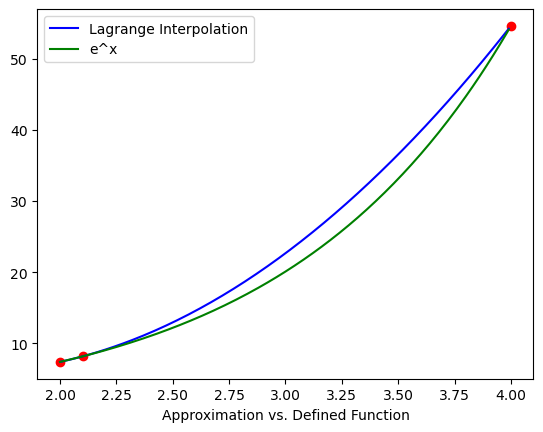

In [19]:
x = np.array([2,2.1,4])
y = np.array([math.exp(2),math.exp(2.1),math.exp(4)])



# for the lagrange interpolation, I will be creating a numpy array that is the 
# domain of our function, using np.arange to generate a set of x values to graph
# the points in between our given data points. this will also be the domain used
# to graph the true function

#np.arange(2,4, .01) is the inclusive range from first x to last x with a step size of 0.01

xlag = np.arange(x[0],x[-1],.01)

# creating an empty np array for our range , ylag

ylag = np.array([])

# the for loop below is the structure that creates our interpolation.
# the zip() function returns an ordered pair, and np.prod() returns the product of
# the contents of the function. the np.append(ylag, py) function inserts a range value
# value for each value in the domain at the end of the loop.

for px in xlag:
  py = 0
  for xi, yi, in zip(x,y):
    py += yi * np.prod( (px- x[x!=xi]) / (xi - x[x!=xi]))
  ylag = np.append(ylag, py)

x_true = np.arange(2,4,.01)

#points
plt.plot(x,y,'ro')

# graph of lagrange interpolation
plt.plot(xlag, ylag, 'b-', label = 'Lagrange Interpolation')

# graph of true function
plt.plot(xlag,np.exp(x_true),'g-', label = 'e^x')

#axis label and legend
plt.xlabel('Approximation vs. Defined Function')
plt.legend()
plt.show()

In [24]:
# error of approximation at x=2.2
# calling ylag[20] as the 20th entry corresponds to the
# x value = 2.2, as our step size is .01 and it takes 20
# steps from 2 to get to 2.2

print('true value = ' + str(f(2.2)))
print('approximate value = ' + str(ylag[20]))

print('true error = ' + str(terror(f(2.2),ylag[20])))
print('relative true error =' + str(rterror(terror(f(2.2),ylag[20]),f(2.2))))

true value = 9.025013499434122
approximate value = 9.109951187580787
true error = -0.08493768814666502
relative true error =-0.009411364110645453


In [26]:
# error of second deriv at x = 2.2
# f''(2.2) = f'(2.2) = f(2.2) 

print('true value of second derivative = ' + str(f(2.2)))
print('approximate value of second derivative = ' + str(finite(ylag[20],10**-2)))
print('true error of second derivative = ' + str(terror(f(2.2),finite(ylag[20],10**-2))))
print('relative true error of second derivative = ' + str(rterror(terror(2.2,finite(ylag[20],10**-2)), f(2.2))))

true value of second derivative = 9.025013499434122
approximate value of second derivative = 9044.928753501154
true error of second derivative = -9035.903740001719
relative true error of second derivative = -1001.9629061018182
